In [22]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [23]:
scale_image_path = '../../images/cropped_scales/random'
images = os.listdir(scale_image_path)
images = [os.path.join(scale_image_path, image) for image in images if image.endswith('only.jpg')]

In [53]:
def is_square(contour):
    _, _, w, h = cv2.boundingRect(contour)
    aspect_ratio = w / float(h)
    return 0.9 < aspect_ratio < 1.1


def is_target_square(c, img_height):
    x, y, w, h = cv2.boundingRect(c)
    aspect_ratio = w / float(h)
    # Check if the contour is square-ish in aspect ratio and located in the upper half of the image
    return 0.8 < aspect_ratio < 1.2 and y < img_height / 2


def contour_solidity(contour):
    area = cv2.contourArea(contour)
    hull_area = cv2.contourArea(cv2.convexHull(contour))
    return float(area) / hull_area if hull_area != 0 else 0


def draw_contours(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image_name = image_path.split('\\')[-1]

    # Threshold to find black regions
    _, binary = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY_INV)

    # Find contours
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)    

    # Filter contours by size, solidity, and position
    filtered_contours = []
    for c in contours:
        x, y, w, h = cv2.boundingRect(c)
        aspect_ratio = w / float(h)
        if (cv2.contourArea(c) > 100 and 0.8 < aspect_ratio < 1.2 and
            contour_solidity(c) > 0.9 and y > 10):  # Adjust the value of y to exclude very top contours
            filtered_contours.append(c)

    # Sort the contours from top to bottom
    filtered_contours = sorted(filtered_contours, key=lambda c: cv2.boundingRect(c)[1])

    # Select the contour which is the large black square
    if filtered_contours:
        target_square = filtered_contours[0]
        x, y, w, h = cv2.boundingRect(target_square)
        square_height_in_pixels = h

        # Draw the bounding box around the large black square on the image
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    else:
        square_height_in_pixels = None

    print(f'Image: {image_name}')
    print(f'Square height in pixels: {square_height_in_pixels}')

    # Display the image with the largest square
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Image with largest square')
    plt.show()


def draw_contour_2(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image_name = image_path.split('\\')[-1]

    # Apply a threshold to get only the black areas in the image
    _, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY_INV)

    # Find contours and hierarchy
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

    # We'll look for the contour with the largest area that has no parent in the hierarchy (not nested)
    # This should exclude the 'C' as it would normally be nested within the white box of the 'cm' text.
    contour_areas = [(i, cv2.contourArea(c)) for i, c in enumerate(contours) if hierarchy[0][i][3] == -1]
    contour_areas = sorted(contour_areas, key=lambda x: x[1], reverse=True)

    # If there are contours found, proceed
    if contour_areas:
        # Take the largest contour assuming it's the square we are interested in
        largest_contour_index = contour_areas[0][0]
        x, y, w, h = cv2.boundingRect(contours[largest_contour_index])
        
        # Draw the bounding box around the largest contour on the image
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        
        # Set the height in pixels
        square_height_in_pixels = h
    else:
        square_height_in_pixels = None

    print(f'Image: {image_name}')
    print(f'Square height in pixels: {square_height_in_pixels}')

    # Display the image with the largest square
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Image with largest square')
    plt.show()

Image: 1701283179_scale_only.jpg
Square height in pixels: 317


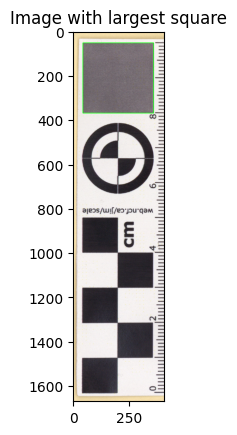

Image: 1701288310_scale_only.jpg
Square height in pixels: 212


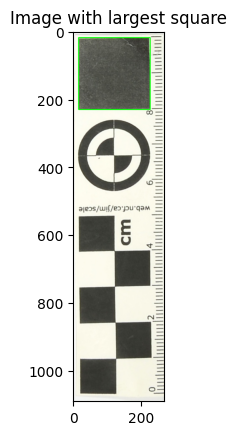

Image: 1701289520_scale_only.jpg
Square height in pixels: 209


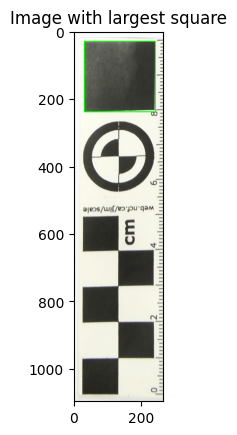

Image: 1701289910_scale_only.jpg
Square height in pixels: 212


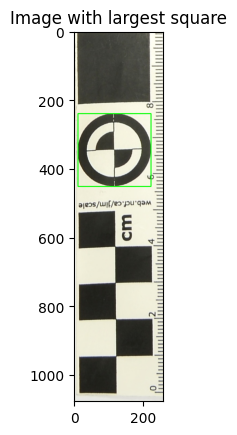

Image: 1701290076_scale_only.jpg
Square height in pixels: 210


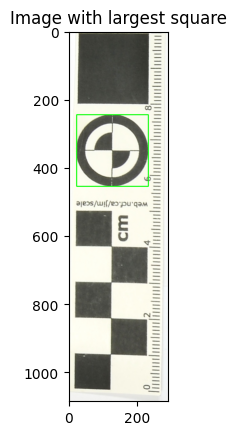

Image: 1701296198_scale_only.jpg
Square height in pixels: None


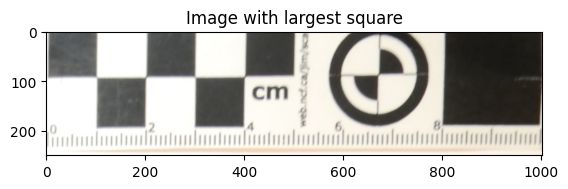

Image: 1701328983_scale_only.jpg
Square height in pixels: 211


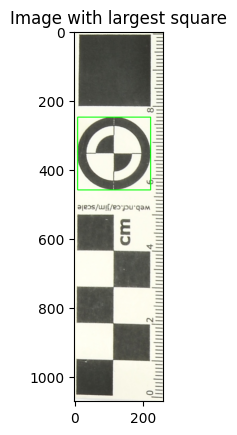

Image: 1701329091_scale_only.jpg
Square height in pixels: 206


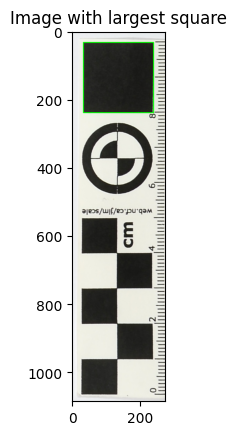

Image: 1805284758_scale_only.jpg
Square height in pixels: 210


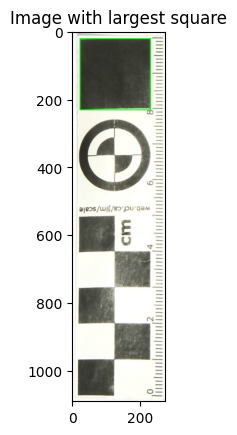

Image: 1805284785_scale_only.jpg
Square height in pixels: 214


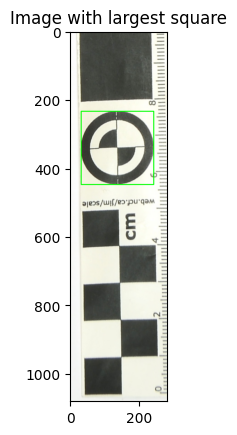

Image: 1805284788_scale_only.jpg
Square height in pixels: 210


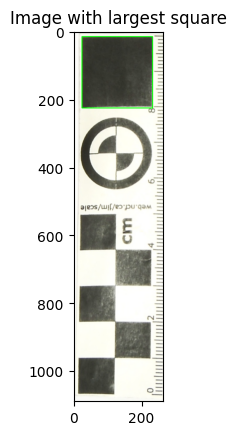

Image: 1805284816_scale_only.jpg
Square height in pixels: 103


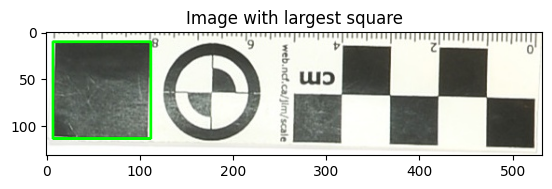

Image: 1805284920_scale_only.jpg
Square height in pixels: 207


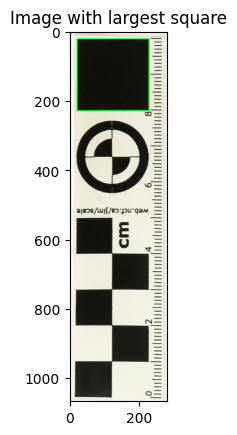

Image: 1805284922_scale_only.jpg
Square height in pixels: 216


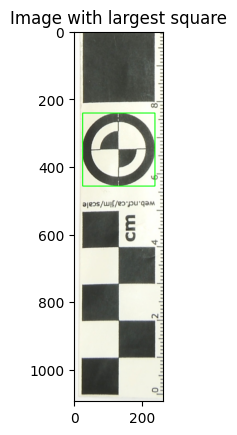

Image: 1805284971_scale_only.jpg
Square height in pixels: 215


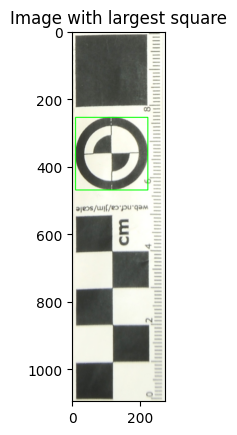

Image: 1806488071_scale_only.jpg
Square height in pixels: 107


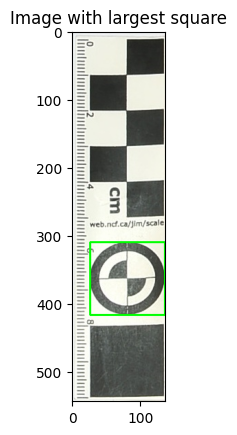

Image: 1806488140_scale_only.jpg
Square height in pixels: None


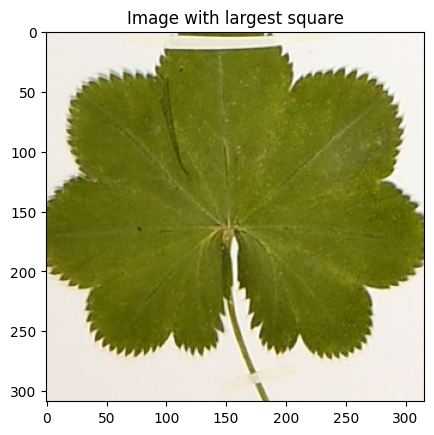

Image: 1806488155_scale_only.jpg
Square height in pixels: 107


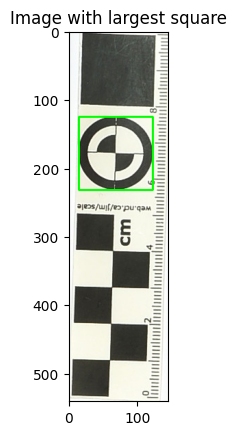

Image: 1806488201_scale_only.jpg
Square height in pixels: 105


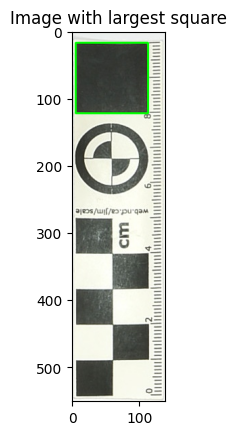

Image: 1809436024_scale_only.jpg
Square height in pixels: 210


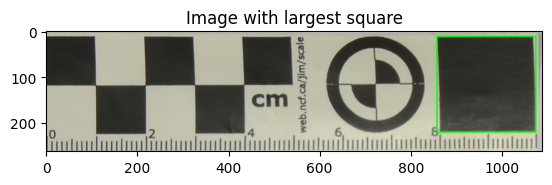

Image: 1837799926_scale_only.jpg
Square height in pixels: 105


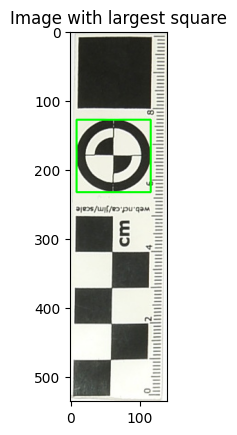

Image: 1837799962_scale_only.jpg
Square height in pixels: 104


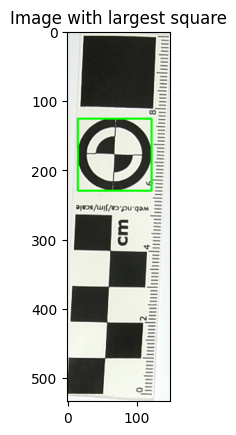

Image: 2234228350_scale_only.jpg
Square height in pixels: 98


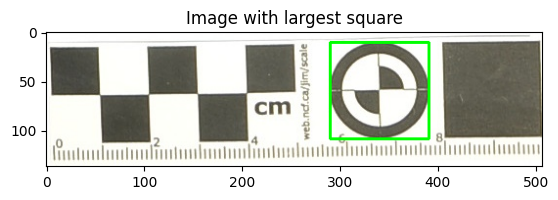

Image: 2234228480_scale_only.jpg
Square height in pixels: 100


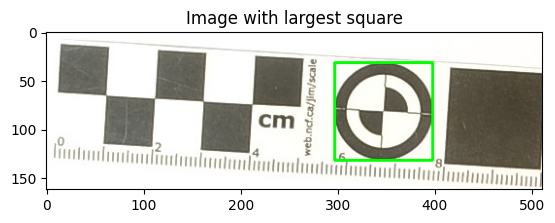

Image: 2234228507_scale_only.jpg
Square height in pixels: 100


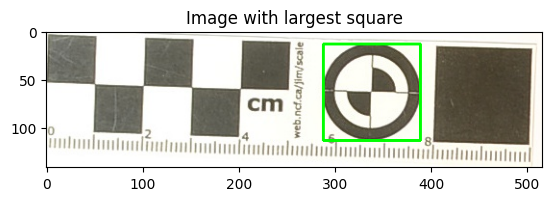

Image: 2234228523_scale_only.jpg
Square height in pixels: 52


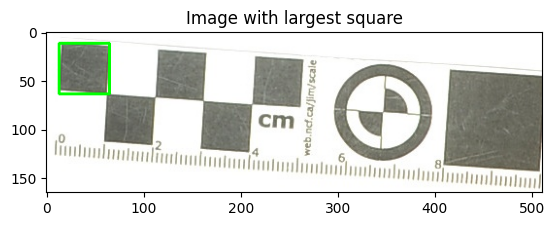

Image: 2234228592_scale_only.jpg
Square height in pixels: 99


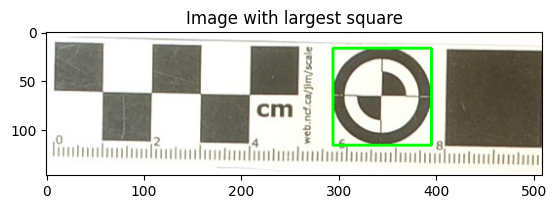

Image: 2234228614_scale_only.jpg
Square height in pixels: 100


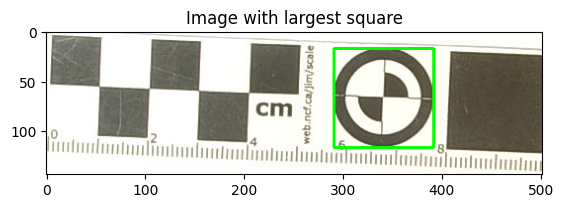

Image: 2856321313_scale_only.jpg
Square height in pixels: 198


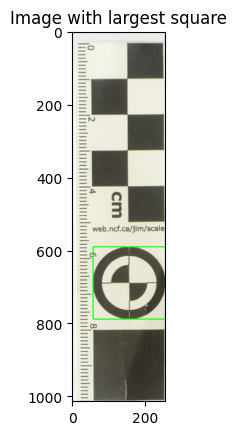

Image: 2856321315_scale_only.jpg
Square height in pixels: 200


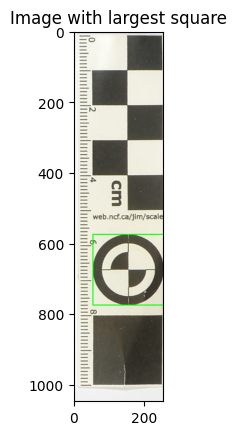

Image: 2856322308_scale_only.jpg
Square height in pixels: 198


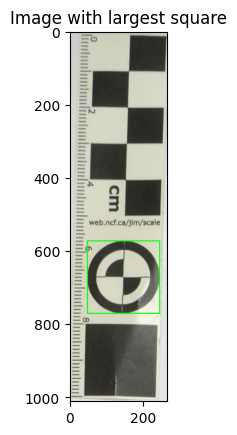

Image: 2856324311_scale_only.jpg
Square height in pixels: 199


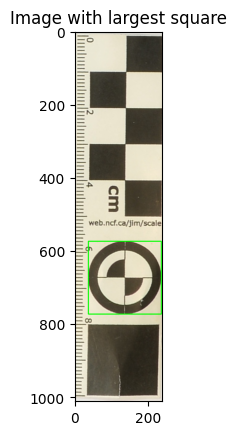

Image: 2856333312_scale_only.jpg
Square height in pixels: 199


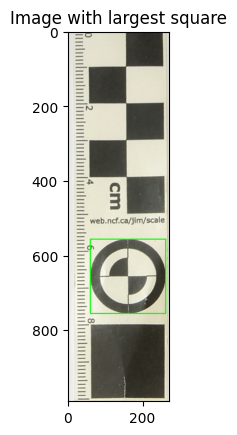

Image: 2856334307_scale_only.jpg
Square height in pixels: 197


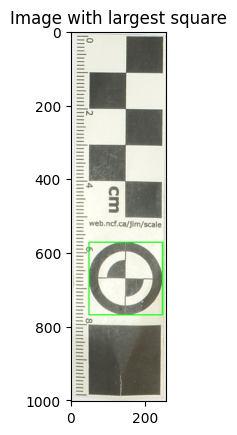

Image: 2856336311_scale_only.jpg
Square height in pixels: 201


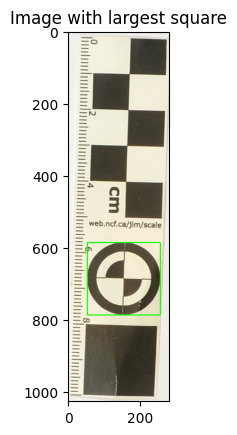

Image: 2856339317_scale_only.jpg
Square height in pixels: 197


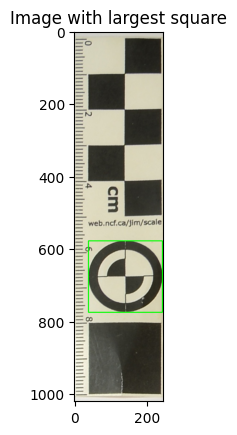

Image: 3015339301_scale_only.jpg
Square height in pixels: 96


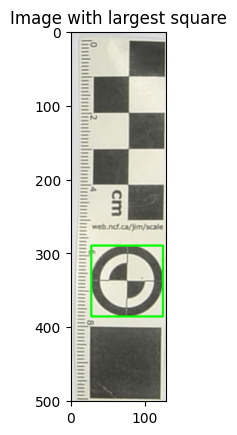

Image: 3015351301_scale_only.jpg
Square height in pixels: 95


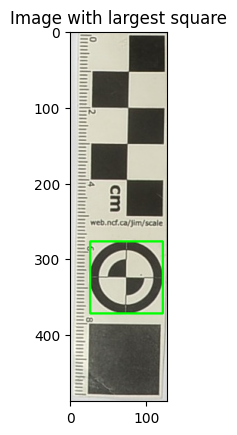

Image: 3018884308_scale_only.jpg
Square height in pixels: 97


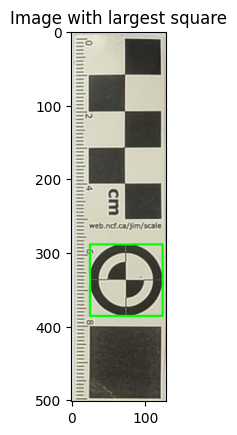

Image: 3018892301_scale_only.jpg
Square height in pixels: 100


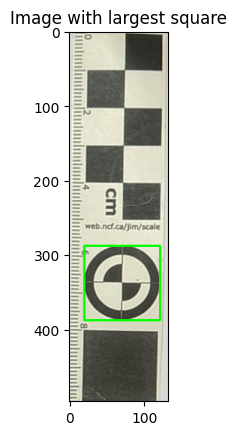

Image: 3018893302_scale_only.jpg
Square height in pixels: 100


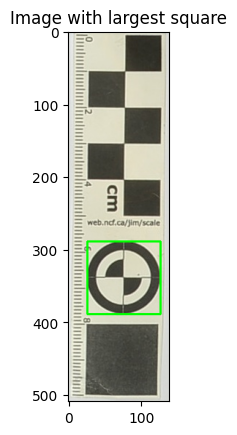

Image: 3381342303_scale_only.jpg
Square height in pixels: 100


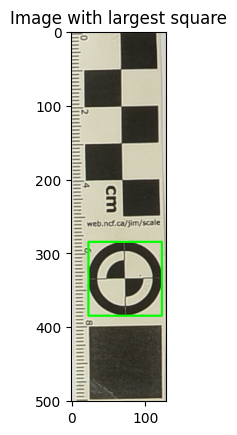

Image: 3381668302_scale_only.jpg
Square height in pixels: 98


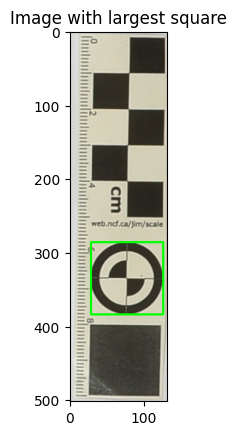

Image: 3382004307_scale_only.jpg
Square height in pixels: 100


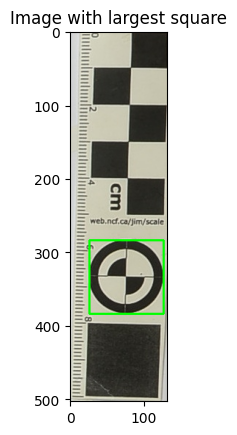

Image: 3397183301_scale_only.jpg
Square height in pixels: 96


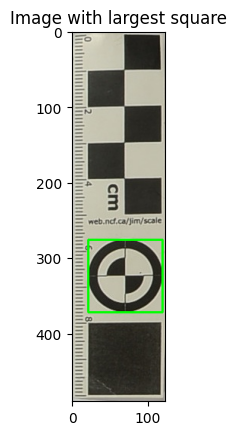

Image: 3397184301_scale_only.jpg
Square height in pixels: 97


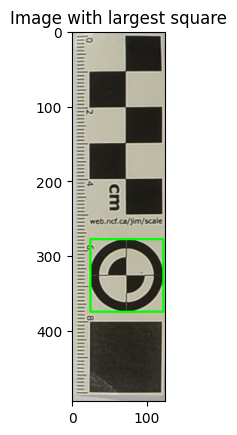

Image: 3406769301_scale_only.jpg
Square height in pixels: 98


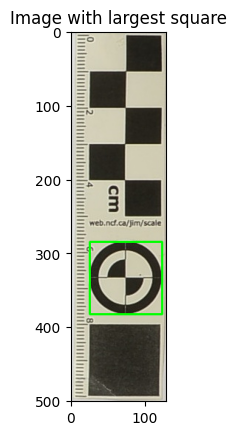

Image: 3406770301_scale_only.jpg
Square height in pixels: 98


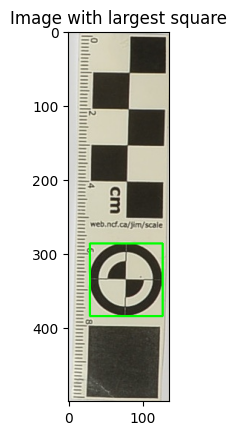

Image: 3406771311_scale_only.jpg
Square height in pixels: 100


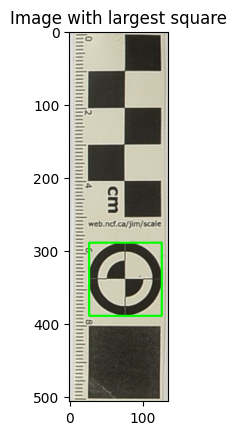

Image: 3406773303_scale_only.jpg
Square height in pixels: 98


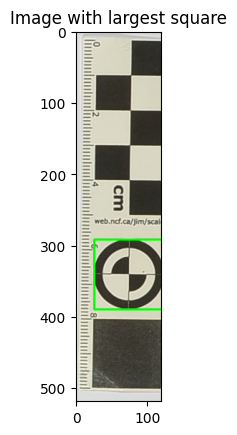

Image: 3406776307_scale_only.jpg
Square height in pixels: 100


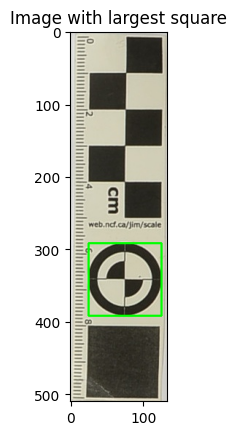

Image: 3412489303_scale_only.jpg
Square height in pixels: 100


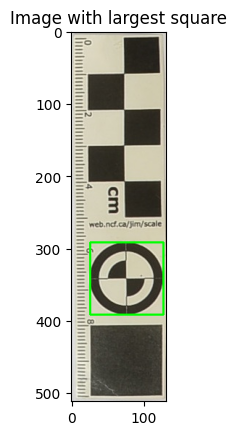

Image: 3412499304_scale_only.jpg
Square height in pixels: 99


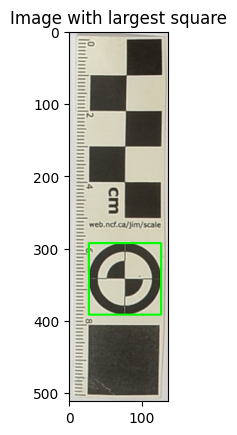

Image: 3755960301_scale_only.jpg
Square height in pixels: 187


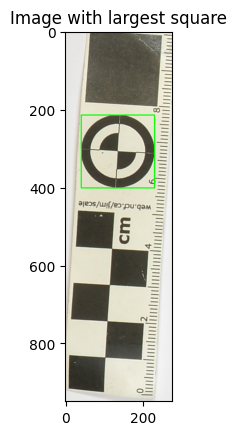

Image: 3804170306_scale_only.jpg
Square height in pixels: 196


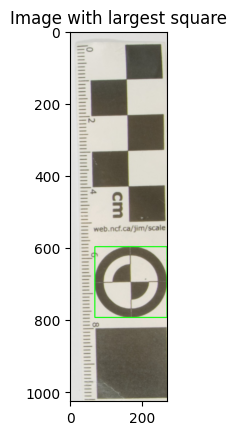

Image: 3804178303_scale_only.jpg
Square height in pixels: 197


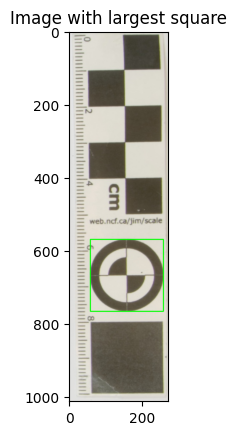

Image: 3804179302_scale_only.jpg
Square height in pixels: 198


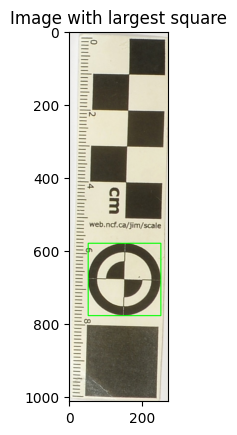

Image: 3994018340_scale_only.jpg
Square height in pixels: 182


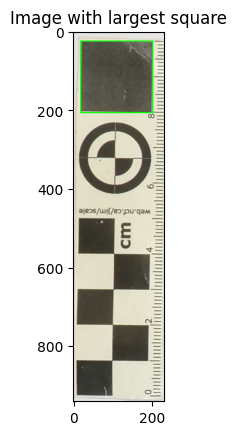

Image: 3994022309_scale_only.jpg
Square height in pixels: 159


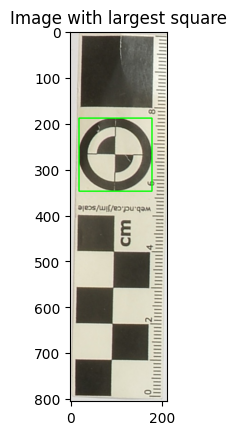

Image: 3994024330_scale_only.jpg
Square height in pixels: 181


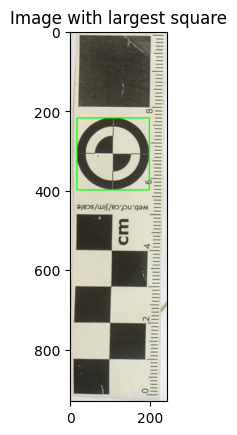

Image: 3994025340_scale_only.jpg
Square height in pixels: 182


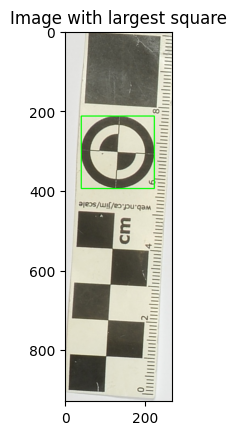

Image: 3999569303_scale_only.jpg
Square height in pixels: 183


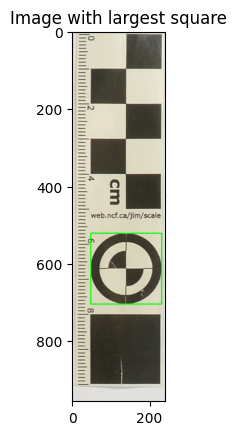

Image: 4002851302_scale_only.jpg
Square height in pixels: 182


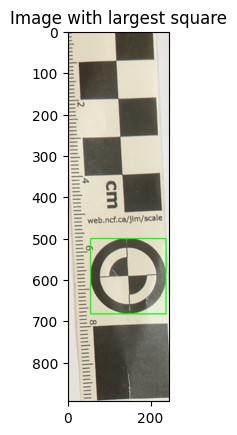

Image: 4002856302_scale_only.jpg
Square height in pixels: 180


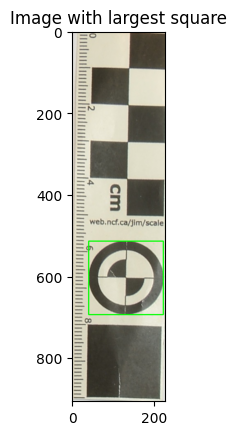

In [55]:
for image in images:
    draw_contours(image)